In [1]:
import pandas as pd

file_path = 'PSP_Jan_Feb_2019.xlsx'
data = pd.read_excel(file_path)
print(data.head())


   Unnamed: 0                tmsp  country  amount  success         PSP  \
0           0 2019-01-01 00:01:11  Germany      89        0     UK_Card   
1           1 2019-01-01 00:01:17  Germany      89        1     UK_Card   
2           2 2019-01-01 00:02:49  Germany     238        0     UK_Card   
3           3 2019-01-01 00:03:13  Germany     238        1     UK_Card   
4           4 2019-01-01 00:04:33  Austria     124        0  Simplecard   

   3D_secured    card  
0           0    Visa  
1           0    Visa  
2           1  Diners  
3           1  Diners  
4           0  Diners  


In [2]:
print("Dataset shape:", data.shape)
print(data.info())
print(data.isnull().sum())


Dataset shape: (50410, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  50410 non-null  int64         
 1   tmsp        50410 non-null  datetime64[ns]
 2   country     50410 non-null  object        
 3   amount      50410 non-null  int64         
 4   success     50410 non-null  int64         
 5   PSP         50410 non-null  object        
 6   3D_secured  50410 non-null  int64         
 7   card        50410 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 3.1+ MB
None
Unnamed: 0    0
tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64


In [3]:
print(data.describe())
print(data.describe(include=['object']))


         Unnamed: 0                           tmsp        amount  \
count  50410.000000                          50410  50410.000000   
mean   25204.500000  2019-01-29 16:28:52.923269120    202.395715   
min        0.000000            2019-01-01 00:01:11      6.000000   
25%    12602.250000  2019-01-14 12:00:36.249999872    133.000000   
50%    25204.500000     2019-01-30 15:20:07.500000    201.000000   
75%    37806.750000     2019-02-13 01:09:50.500000    269.000000   
max    50409.000000            2019-02-28 23:48:19    630.000000   
std    14552.257872                            NaN     96.274730   

            success    3D_secured  
count  50410.000000  50410.000000  
mean       0.202896      0.238266  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  
std        0.402160      0.426027  
        country      PSP    card
count     50410    50410   504

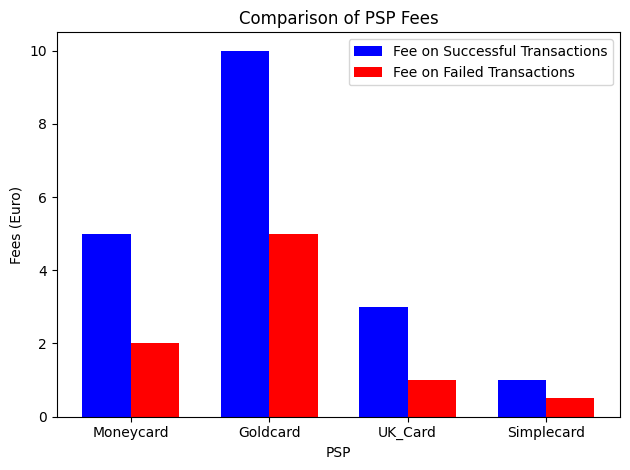

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    'PSP': ['Moneycard', 'Goldcard', 'UK_Card', 'Simplecard'],
    'Fee_Successful': [5, 10, 3, 1],
    'Fee_Failed': [2, 5, 1, 0.5]
}

df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(df['PSP']))

bar1 = plt.bar(index, df['Fee_Successful'], bar_width, label='Fee on Successful Transactions', color='b')
bar2 = plt.bar([p + bar_width for p in index], df['Fee_Failed'], bar_width, label='Fee on Failed Transactions', color='r')

plt.xlabel('PSP')
plt.ylabel('Fees (Euro)')
plt.title('Comparison of PSP Fees')
plt.xticks([p + bar_width / 2 for p in index], df['PSP'])
plt.legend()

plt.tight_layout()
plt.show()


            Success Rate  Total Transactions
PSP                                         
Goldcard      100.000000                   1
Moneycard      50.000000                   2
Simplecard     66.666667                   3
UK_Card        50.000000                   2


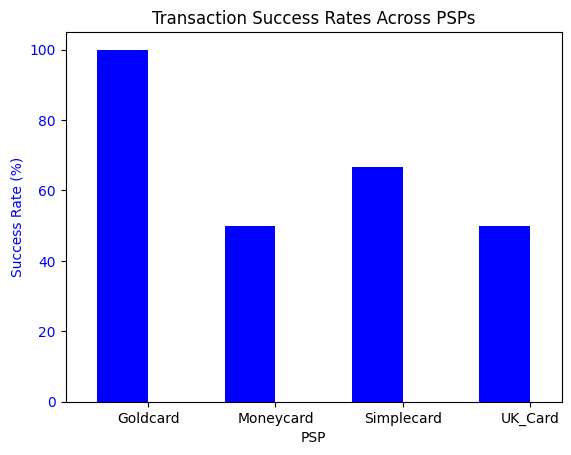

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.DataFrame({
    'PSP': ['Moneycard', 'Moneycard', 'Goldcard', 'UK_Card', 'UK_Card', 'Simplecard', 'Simplecard', 'Simplecard'],
    'success': [1, 0, 1, 1, 0, 1, 1, 0]
})

# Calculate success rates
success_rates = data.groupby('PSP')['success'].agg(['mean', 'count'])
success_rates.rename(columns={'mean': 'Success Rate', 'count': 'Total Transactions'}, inplace=True)
success_rates['Success Rate'] *= 100  # Convert to percentage

# Display the results
print(success_rates)

# Visualization
fig, ax1 = plt.subplots()

# Bar chart for success rates
success_rates['Success Rate'].plot(kind='bar', color='blue', ax=ax1, position=1, width=0.4)
ax1.set_ylabel('Success Rate (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Transaction Success Rates Across PSPs')
ax1.set_xlabel('PSP')

# Show the plot
plt.xticks(rotation=0)  
plt.show()


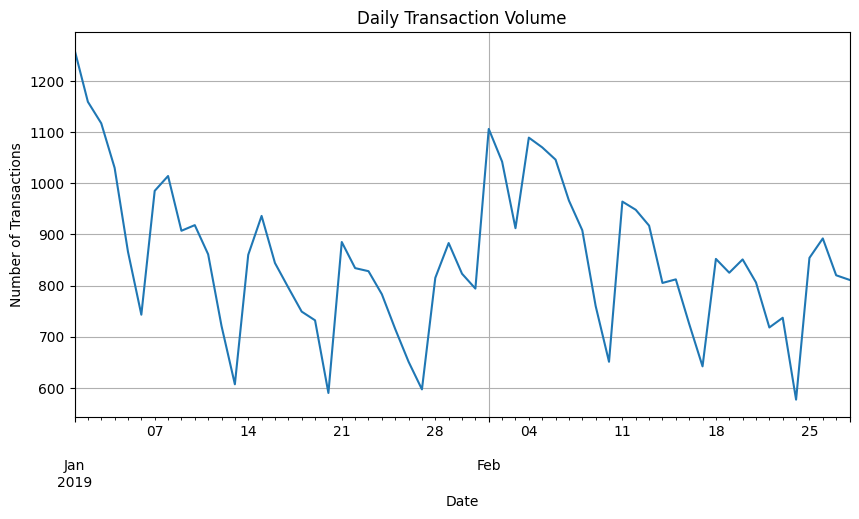

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'PSP_Jan_Feb_2019.xlsx'
data = pd.read_excel(file_path)
data['tmsp'] = pd.to_datetime(data['tmsp'])  # Ensure the timestamp is in datetime format

# Set the timestamp column as the index of the dataframe
data.set_index('tmsp', inplace=True)

# Resampling the data to get daily transaction counts
daily_transactions = data.resample('D').size()  

# Visualization
plt.figure(figsize=(10, 5))
daily_transactions.plot()
plt.title('Daily Transaction Volume')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data
data = pd.read_excel('PSP_Jan_Feb_2019.xlsx')

# Data preprocessing
label_encoder = LabelEncoder()
data['PSP'] = label_encoder.fit_transform(data['PSP'])
data['country'] = label_encoder.fit_transform(data['country'])
data['card'] = label_encoder.fit_transform(data['card'])

# Feature selection
features = data[['amount', 'PSP', 'country', 'card', '3D_secured']]
target = data['success']

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

# Validation
# Logistic Regression
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Random Forest
y_pred_rf = random_forest.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.8095615949216425
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      8162
           1       0.00      0.00      0.00      1920

    accuracy                           0.81     10082
   macro avg       0.40      0.50      0.45     10082
weighted avg       0.66      0.81      0.72     10082

Random Forest Accuracy: 0.7633406070224162
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      8162
           1       0.29      0.16      0.21      1920

    accuracy                           0.76     10082
   macro avg       0.55      0.53      0.53     10082
weighted avg       0.72      0.76      0.74     10082



C:\Users\rarav\miniconda3\envs\myenvironment\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rarav\miniconda3\envs\myenvironment\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rarav\miniconda3\envs\myenvironment\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [4]:
import pandas as pd

# Load the dataset
data = pd.read_excel('PSP_Jan_Feb_2019.xlsx')
data['tmsp'] = pd.to_datetime(data['tmsp'])

data.sort_values(by='tmsp', inplace=True)
data['repeated_attempt'] = data.duplicated(subset=['country', 'amount', 'card'], keep=False)
data['repeated_attempt'] = data['repeated_attempt'].astype(int)


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

# Set up the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\rarav\miniconda3\envs\myenvironment\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rarav\miniconda3\envs\myenvironment\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rarav\miniconda3\envs\myenvironment\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\rarav\miniconda3\envs\myenvironment\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
   

Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best accuracy found:  0.7944604809454056


In [7]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display results
print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.81
Recall: 0.05
F1 Score: 0.08
Confusion Matrix:
[[8081   81]
 [1833   87]]
